# Reporte de avances modelo Sentan-I

In [1]:
from Src.pre_processing import load_data, split, to_tensor, to_labels 
from Src.Sentan_Model import Sentan_Model
from Src.Dias_Model import Dias_Model
from Src.model_evaluation import confussion_matrix, summary, accuracy

### Preparación de los datos

Los datos serán cargados desde una versión del conjunto de datos RAVDESS, se representan como un conjunto de 193 variables por cada muestra.

In [2]:
data_path = 'Data/data.pkl'
X, y, labels = load_data(data_path)

## Modelo base
Como modelo base se utiliza un modelo propuesto por Dias, por falta de información este modelo no puede ser replicado de manera exacta, sin embargo es un buen modelo a utilizar como base ya que presenta muchas oportunidades de mejora.

Este modelo presenta la siguiente topología:

<img src="imgs/topologia_Issa.png" alt="Topología Dias" width="700"/>

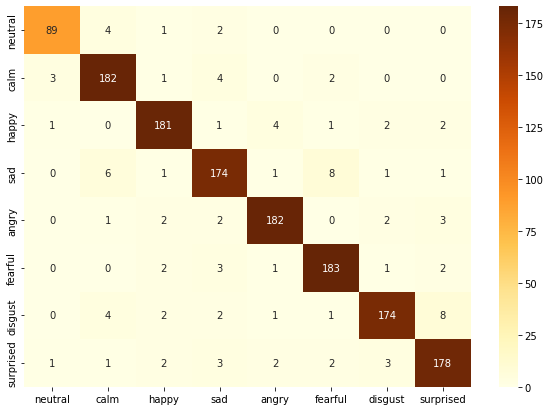

              precision    recall  f1-score   support

           0      0.947     0.927     0.937        96
           1      0.919     0.948     0.933       192
           2      0.943     0.943     0.943       192
           3      0.911     0.906     0.909       192
           4      0.953     0.948     0.950       192
           5      0.929     0.953     0.941       192
           6      0.951     0.906     0.928       192
           7      0.918     0.927     0.922       192

    accuracy                          0.933      1440
   macro avg      0.934     0.932     0.933      1440
weighted avg      0.933     0.933     0.933      1440



In [3]:
import torch
base_model = Dias_Model()
base_model.load_state_dict(torch.load('Models/base_700.pt'))

X, y = to_tensor(X, y)
pred = base_model(X)

decode_pred = torch.argmax(pred, dim=1)

confussion_matrix(y, decode_pred, labels)
summary(y, decode_pred)


## Modelo Sentan-I
Modelo creado para intentar superar al modelo de Dias Issa et al. basado en la información teórica que se brinda en su investigación.

In [4]:
sentan_model = Sentan_Model()

## Propuestas de mejora